# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('previsao_de_renda.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Definição dos hiperparâmetros para busca
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuração do modelo e busca em grade
tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)

# Impressão do melhor R² e hiperparâmetros
print(f"Melhor R² da Árvore de Regressão: {r2_tree}")
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Visualização das importâncias das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, best_tree.feature_importances_)
plt.xlabel("Importância da variável")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis na Árvore de Regressão")
plt.show()


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).


In [63]:
X = df.drop(columns=['renda'])
y = df['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?


In [64]:
#Example data preprocessing pipeline
# Replace with your actual data loading step
# Assuming X_train and y_train are already defined
# For demonstration: let's convert the dataset
from sklearn.linear_model import Ridge

# Inspecting the dataset for non-numeric columns
def preprocess_data(X):
    # Convert dates to numerical values (if any date columns)
    for col in X.columns:
        if np.issubdtype(X[col].dtype, np.datetime64) or "date" in col.lower():
            X[col] = pd.to_datetime(X[col], errors='coerce').astype(int) // 10 ** 9  # Convert to Unix timestamp

    # Convert any remaining non-numeric columns to numeric or drop them
    X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
    return X


# Apply preprocessing to training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure the target variable (y) is numeric
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Ensure no NaN values exist after processing (optional)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ridge Regression model
alphas = [0.1, 1.0, 10.0]
for alpha in alphas:
    model = Ridge(alpha=alpha)  # Create Ridge model
    model.fit(X_train, y_train)  # Train model on processed training set
    y_pred = model.predict(X_test)  # Predict on test set
    r2 = r2_score(y_test, y_pred)  # Calculate R^2 score
    print(f"R^2 Score for alpha {alpha}: {r2}")

R^2 Score for alpha 0.1: 0.26745645784958083
R^2 Score for alpha 1.0: 0.2674432957650985
R^2 Score for alpha 10.0: 0.26747246174164996


3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?


In [65]:
# LASSO Regression Model
from sklearn.linear_model import Lasso
alphas = [0.1, 1.0, 10.0]  # Regularization strengths to test
for alpha in alphas:
    model = Lasso(alpha=alpha)  # Create LASSO model
    model.fit(X_train, y_train)  # Train on training data
    y_pred = model.predict(X_test)  # Predict on test data
    r2 = r2_score(y_test, y_pred)  # Calculate R^2 score
    print(f"LASSO - Alpha {alpha}, R^2 Score: {r2}")

LASSO - Alpha 0.1, R^2 Score: 0.26743545646056444
LASSO - Alpha 1.0, R^2 Score: 0.26751449857304577
LASSO - Alpha 10.0, R^2 Score: 0.26830479872908175


/home/fabio/.config/JetBrains/DataSpell2024.3/projects/workspace/.venv1/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+11, tolerance: 7.723e+07
  model = cd_fast.enet_coordinate_descent(


4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?


In [66]:
from sklearn.linear_model import LinearRegression
# Simulated Stepwise Regression using Forward Selection
def stepwise_forward_selection(X_train, y_train, X_test, y_test):
    best_features = []
    remaining_features = list(X_train.columns)
    best_r2_test = -float('inf')

    while remaining_features:
        # Test each remaining feature by adding it to the current set
        scores = []
        for feature in remaining_features:
            candidate_features = best_features + [feature]
            model = LinearRegression()
            model.fit(X_train[candidate_features], y_train)

            # Calculate R^2 score on the test set
            y_pred_test = model.predict(X_test[candidate_features])
            r2_test = r2_score(y_test, y_pred_test)
            scores.append((r2_test, feature))

        # Find the best improvement
        scores.sort(reverse=True)  # Sort by R^2 descending
        best_r2_candidate, best_feature_candidate = scores[0]

        # Stop if no improvement
        if best_r2_candidate <= best_r2_test:
            break

        # Update the best features and continue
        best_features.append(best_feature_candidate)
        best_r2_test = best_r2_candidate
        remaining_features.remove(best_feature_candidate)

    return best_features, best_r2_test

# Assuming X_train, X_test, y_train, y_test have already been defined
best_features, best_r2 = stepwise_forward_selection(X_train, y_train, X_test, y_test)

print("Selected Features via Stepwise Regression:", best_features)
print("Best R^2 on Test Set:", best_r2)


Selected Features via Stepwise Regression: ['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'idade', 'educacao_Superior completo', 'posse_de_imovel', 'tipo_renda_Empresário', 'qt_pessoas_residencia', 'estado_civil_União', 'data_ref_2015-06-01', 'data_ref_2016-03-01', 'tipo_renda_Bolsista', 'tipo_renda_Servidor público', 'data_ref_2015-11-01', 'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário', 'data_ref_2015-07-01', 'data_ref_2016-01-01']
Best R^2 on Test Set: 0.2697657047503417


5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?


In [67]:
# Ridge Coefficients
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Coefficients:", ridge.coef_)

# LASSO Coefficients
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print("LASSO Coefficients:", lasso.coef_)

# Stepwise (selected features)
stepwise_features, _ = stepwise_forward_selection(X_train, y_train, X_test, y_test)
stepwise_model = LinearRegression()
stepwise_model.fit(X_train[stepwise_features], y_train)
print("Stepwise Coefficients:", dict(zip(stepwise_features, stepwise_model.coef_)))


Ridge Coefficients: [-8.55679537e-02  7.24967850e-03  6.01544000e+00  3.00977268e+02
 -9.18323583e+02  3.58657777e+01  5.51185586e+02  1.01388128e+03
  8.95976661e+01  4.36895723e+02  8.04469589e+02  5.54921181e+02
  9.95895370e+02  7.60587678e+02  8.55028803e+02  9.52457613e+02
  8.54338777e+02  1.16265942e+03  1.72535272e+03  1.33306105e+03
  1.08441992e+03  1.27217763e+03  5.83966283e+03 -8.56815573e+02
  8.67485761e+02  2.81635004e+03  8.74857579e+01  9.29032766e+02
  8.86464037e+01  7.25976846e+02 -4.09607297e+02  8.78943635e+02
  5.14279875e+02 -3.05066655e+02  9.61908323e+02 -1.71651691e+02
 -1.95260900e+02 -3.49288431e+02  8.47178419e+02  6.01499196e+02]
LASSO Coefficients: [ 2.10548889e-02  7.14799107e-03  4.91836189e+00  2.96250265e+02
 -1.09359331e+02  3.64578360e+01  5.50810831e+02  2.07857405e+02
 -5.76246983e+01  1.56579785e+02  4.15398567e+02  5.53136312e+01
  3.97084949e+02  4.94139893e+01  4.18551377e+01  3.03179051e+01
 -1.39714837e+02  2.53099407e+01  4.88331841e+02 

6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.


Melhor R² da Árvore de Regressão: 0.34692219774337096
Melhores hiperparâmetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


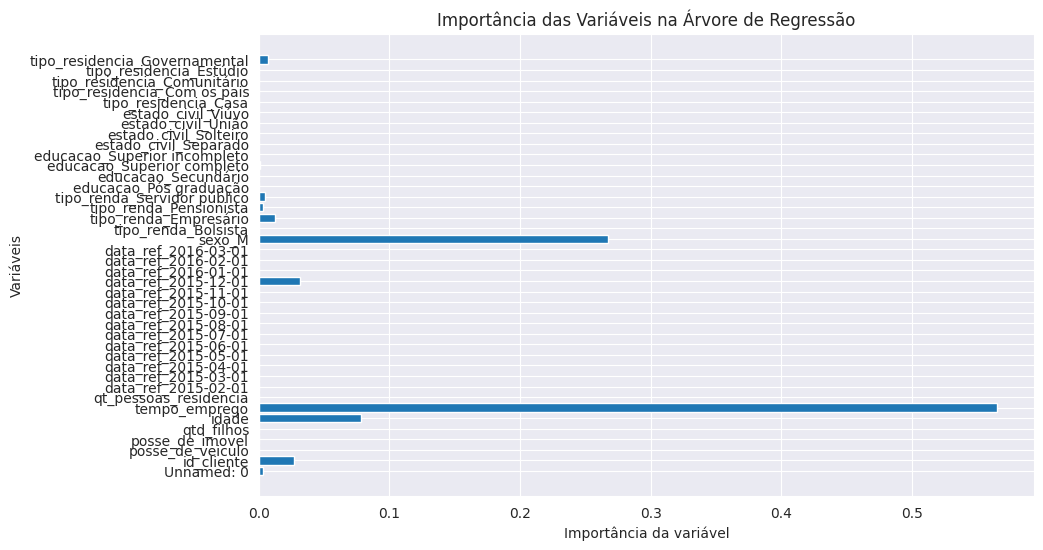

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Definição dos hiperparâmetros para busca
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuração do modelo e busca em grade
tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)

# Impressão do melhor R² e hiperparâmetros
print(f"Melhor R² da Árvore de Regressão: {r2_tree}")
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Visualização das importâncias das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, best_tree.feature_importances_)
plt.xlabel("Importância da variável")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis na Árvore de Regressão")
plt.show()